# MNIST handwriting classification using <font color=red>CNN</font>

# Index

1. Data

  1.1 Loading MNIST handwritten digits Data

  1.2 Data preprocessing

2. A model that linearly classifies using CNN

3. Training

4. Test

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.17.0


# [1] Data

## [1.1] Loading MNIST handwritten digits Data

In [ ]:
# from tensorflow.example.tutorials.mnist import input_data
# https://www.tensorflow.org/get_started/mnist/beginners
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")


x_train shape: (60000, 28, 28), y_train shape: (60000,)
x_test shape: (10000, 28, 28), y_test shape: (10000,)


첫 번째 데이터 체크

5
img shape: (28, 28)


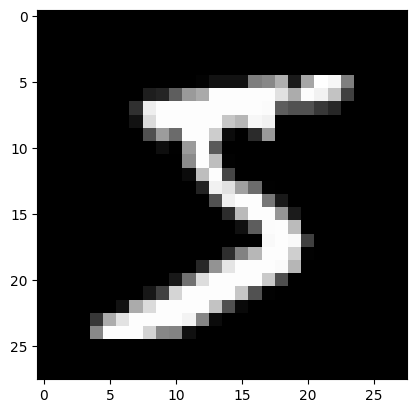

In [ ]:
print(y_train[0])

img = x_train[0]
print(f"img shape: {img.shape}")
plt.imshow(img, cmap='gray')
plt.show()

- CNN 사용을 위해 채널 수를 추가해서 3D tensor로 변환.
- 흑백 사진은 채널이 한개.

## [1.2] Data preprocessing
- 딥러닝 프레임워크는 **float32** 형식을 사용하여 연산을 수행.
- 완전 연결된 신경망(fully connected layer)을 사용할 때는 입력(각 이미지)를 1차원 벡터로 변환.
- 0에서 1 사이의 정규화를 통해 신경망이 수렴 속도를 높이고 학습 안정성을 높이는 데 도움.

In [ ]:
# 2D -> 3D
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Convert to float32
x_train, x_test = x_train.astype('float32'), x_test.astype('float32')

# Normalize image value from [0, 255] tp [0, 1].
x_train = x_train / 255
x_test = x_test / 255

# [2] A model that linearly classifies using CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
# 특징 추출
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())

# 분류
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# model compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# [3] Training

In [ ]:
# training
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 48s 123ms/step - accuracy: 0.7026 - loss: 0.9108 - val_accuracy: 0.9767 - val_loss: 0.0827
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 79s 115ms/step - accuracy: 0.9575 - loss: 0.1466 - val_accuracy: 0.9829 - val_loss: 0.0607
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 114ms/step - accuracy: 0.9725 - loss: 0.0992 - val_accuracy: 0.9858 - val_loss: 0.0510
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 84s 121ms/step - accuracy: 0.9772 - loss: 0.0779 - val_accuracy: 0.9886 - val_loss: 0.0419
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 79s 112ms/step - accuracy: 0.9831 - loss: 0.0598 - val_accuracy: 0.9875 - val_loss: 0.0454
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 85s 119ms/step - accuracy: 0.9843 - loss: 0.0549 - val_accuracy: 0.9891 - val_loss: 0.0427
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 79s 112ms/step - accuracy: 0.9856 - loss: 0.0500 - val_accuracy: 0.9888 - val_loss: 0.0372
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 113ms/step - accuracy: 0.9883 - loss: 0

Visualizing the learning process

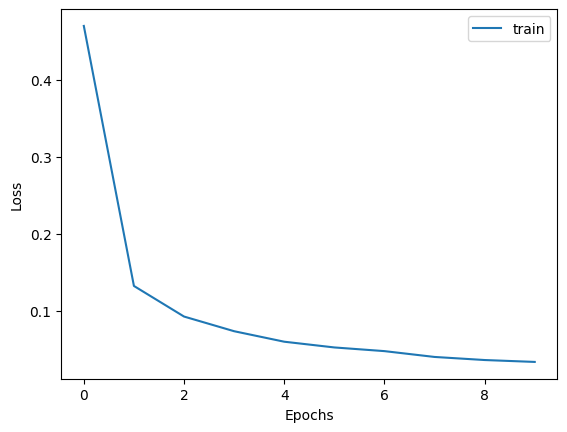

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# [4] Test

In [ ]:
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
print(f"Train loss: {train_loss}, Train accuracy: {train_acc}")

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test loss: {test_loss}, Test accuracy: {test_acc}")

# 전제 테스트 데이터 예측
# predict = model.predict(x_test)
# print(predict)

1875/1875 - 16s - 9ms/step - accuracy: 0.9955 - loss: 0.0157
Train loss: 0.0156770758330822, Train accuracy: 0.9955499768257141
313/313 - 3s - 8ms/step - accuracy: 0.9933 - loss: 0.0224
Test loss: 0.022424347698688507, Test accuracy: 0.9933000206947327


Test Visualization

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


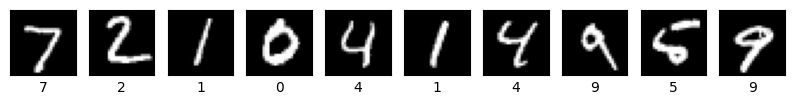

In [ ]:
# 10개 테스트 데이터만 뽑아서 시각화
n_images = 10
test_images = x_test[:n_images]
predictions = model.predict(test_images)

# Display image and model prediction
plt.figure(figsize=(10, 10))
for i in range(n_images):
  plt.subplot(1, n_images, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(np.argmax(predictions[i])) # 가장 큰 값의 인덱스 출력
  plt.grid(False)
  plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
plt.show()